In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv("Visadataset.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [4]:
df.drop('case_id',axis=1,inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [10]:
df[["continent","education_of_employee"]].value_counts()

continent      education_of_employee
Asia           Bachelor's               7168
               Master's                 6480
               High School              2290
North America  Master's                 1408
Europe         Bachelor's               1299
North America  Bachelor's               1225
Europe         Master's                 1097
Asia           Doctorate                 923
Europe         Doctorate                 846
               High School               490
North America  High School               401
South America  Bachelor's                333
               Master's                  293
Africa         Master's                  288
North America  Doctorate                 258
Africa         Bachelor's                143
South America  High School               137
               Doctorate                  89
Oceania        Master's                   68
               Bachelor's                 66
Africa         High School                66
               Doc

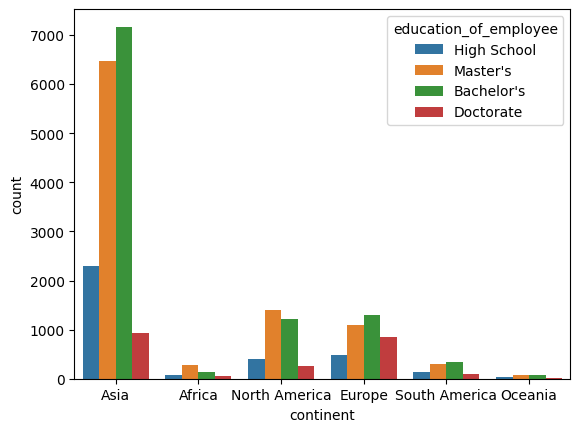

In [12]:
sns.countplot(data=df,x="continent",hue="education_of_employee");

In [18]:
cat_feature= [feature for feature in df.columns if df[feature].dtype =='O']#list comprehnsion
num_feature= [feature for feature in df.columns if df[feature].dtype !='O']

In [24]:
# print columns
print('We have {} numerical features {}:'.format(len(num_feature),num_feature))
print('\nWe have {} categorical features : {}'.format(len(cat_feature), cat_feature))

We have 3 numerical features ['no_of_employees', 'yr_of_estab', 'prevailing_wage']:

We have 8 categorical features : ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [ ]:
for col in cat_feature:
    print(round(df[col].value_counts(normalize=True)*100,2))

continent
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: proportion, dtype: float64 %
education_of_employee
Bachelor's     40.16
Master's       37.81
High School    13.42
Doctorate       8.60
Name: proportion, dtype: float64 %
has_job_experience
Y    58.09
N    41.91
Name: proportion, dtype: float64 %
requires_job_training
N    88.4
Y    11.6
Name: proportion, dtype: float64 %
region_of_employment
Northeast    28.24
South        27.54
West         25.85
Midwest      16.90
Island        1.47
Name: proportion, dtype: float64 %
unit_of_wage
Year     90.12
Hour      8.47
Week      1.07
Month     0.35
Name: proportion, dtype: float64 %
full_time_position
Y    89.38
N    10.62
Name: proportion, dtype: float64 %
case_status
Certified    66.79
Denied       33.21
Name: proportion, dtype: float64 %
